<div style="text-align: right"> Diego Emiliano Rodea Ruano 

 # Montecarlo

Importamos nuestras librerias

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Definimos nuestra función con un random

In [2]:
def caminata_aleatoria(N):
    s = 0
    ss = [s]
    for i in range(N):
        z = random.choice([-1,1])
        s += z
        ss.append(s)
    return ss, s

Creamos una gráfica donde podamos visualizar la función con random y diferentes corridas

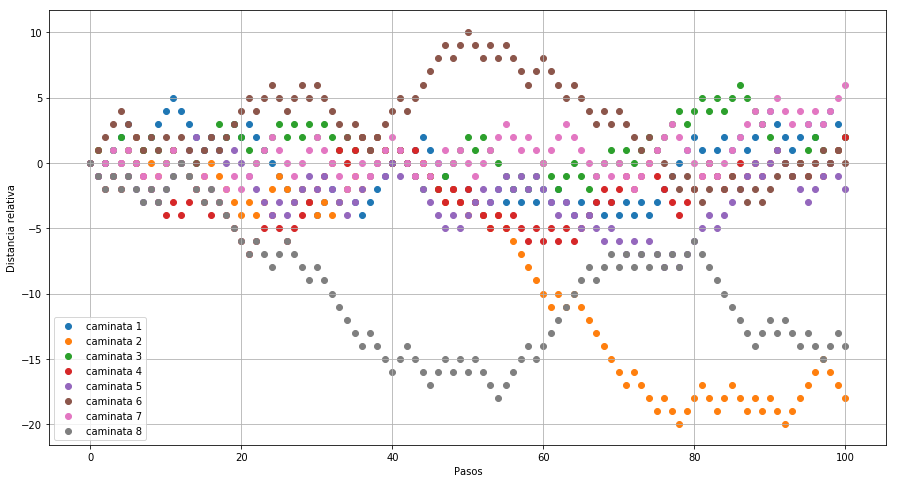

In [13]:
N=100
tiempo = range(N+1)
plt.figure(figsize=(15,8))
for i in range(8):
    ss, s = caminata_aleatoria(N)
    plt.scatter(tiempo,ss,label='caminata {}'.format(i+1))
plt.xlabel('Pasos')
plt.ylabel('Distancia relativa')
plt.legend(loc='best')
plt.grid()
plt.show()

Creamos otra función con un rango de números

In [4]:
def tirar_dado():
    x = random.randint(1,100)
    if x <= 50:
        return False
    elif x >= 50:
        return True
    elif x == 100:
        return False

Y jugamos al dado con nuestra función de dados

In [5]:
N=100
ganar=0
perder=0
for i in range(N):
    if tirar_dado():
        #print('Felicidades')
        ganar += 1
    else:
        #print('Sigue participando')
        perder += 1 
print('Ganamos',ganar,' veces y perdimos', perder, ' veces')

Ganamos 51  veces y perdimos 49  veces


Ahora creemos un apostador con la función del dado

In [6]:
def apostador(cap_inicial, apuesta, n_apuestas):
    capital = cap_inicial
    ccapital = [cap_inicial]
    
    for i in range (n_apuestas):
        if tirar_dado():
            capital += apuesta
            ccapital.append(capital)
        else:
            capital -= apuesta
            ccapital.append(capital)
    return ccapital

Veamos una simulación del apostador con una inversión inicial de $10,000 y una diferencia de 10 pesos cada mes, por 10 meses

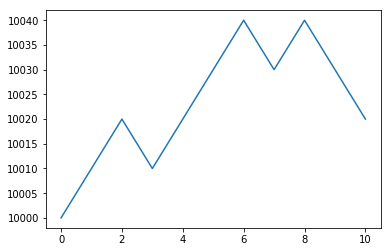

In [7]:
plt.plot(apostador(10000, 10, 10))
plt.show()

In [8]:
apostador(10000, 50, 12)

[10000,
 10050,
 10000,
 10050,
 10000,
 9950,
 10000,
 9950,
 9900,
 9950,
 10000,
 10050,
 10000]

Ahora hacemos varias corridas y las visualizamos

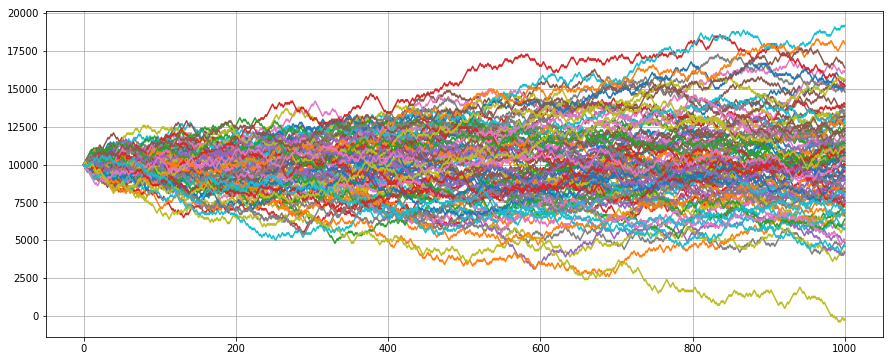

Ganamos 56  veces y perdimos 42  veces y nos quedamos tablas 2


In [9]:
N = 100
n = 1000
ganar = 0
perder = 0
igual = 0
plt.figure(figsize=(15,6))
for i in range(N):
    x = apostador(10000, 100, n)
    if x[n] < 10000:
        perder += 1
    elif x[n] > 10000:
        ganar += 1
    elif x[n] == 10000:
        igual += 1
    plt.plot(x)
plt.grid()
plt.show()
print('Ganamos',ganar,' veces y perdimos', perder, ' veces y nos quedamos tablas', igual)

<br>

<br>

<br>

<br>

<br>

<br>

### Estimación de Pi con Montecarlo

Creamos un cuadrado de lado $4$ y área de $16$ unidades cuadradas. Además de crear un circulo con radio $2$, que su área será $4\pi$

Para poder encontrar el valor de pi, usaremos esta relación:
$$
\frac{Área-del-círculo}{Área-del-cuadrado} = \frac{Número-de-puntos-dentro-del-círculo}{Número-de-puntos-totales}\\
\frac{\pi r^2}{16}=\frac{Número-de-puntos-dentro-del-círculo}{Número-de-puntos-totales}\\ \space \\
\pi = \frac{16*Número-de-puntos-dentro-del-círculo}{r^2*Número-de-puntos-totales}
$$

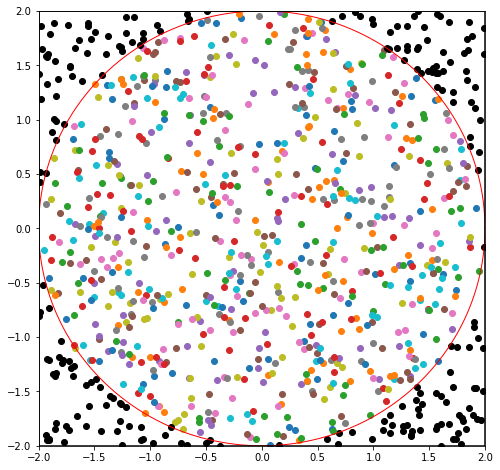

Pi: 3.116


In [10]:
fig, ax = plt.subplots(figsize = (8,8))
puntos=1000
dentro = 0
for i in range(puntos):
    x = random.uniform(-2,2)
    y = random.uniform(-2,2)
    if np.sqrt(x**2+y**2) < 2:
        dentro += 1
        plt.scatter(x,y)
    else:
        plt.scatter(x,y,c='k')
        
lado=4
theta = np.linspace(0, 2*np.pi, 1000)
r = np.sqrt(lado)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
pi = lado*lado*dentro/(r**2*puntos)

ax.plot(x1, x2, linewidth=1, c='r')
plt.axhline(y=-2, color='k', linestyle='-')
plt.axhline(y=2, color='k', linestyle='-')
plt.axvline(x=-2, color='k', linestyle='-')
plt.axvline(x=2, color='k', linestyle='-')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()
print('Pi:', pi)

La simulación con Montecarlo, nos es muy útil para generar situaciones donde nuestro sistema sea uno no determinístico. Además de que es una herramienta fantástica para producir valores aleatorios uniformes.